In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

In [2]:
#Get the S&P 500 data in
sp500 = yf.download('^GSPC', start='1962-01-01', end='2024-02-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
sp500.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

## Economic Data

- Unemployment Rate
- CPI
- GDP
- 10 year treasury rate
- Federal Funds Rate
- target rate (DFEDTARU)
- 3 month treasury rate

In [4]:
API_KEY = 'ae634d282ab47478799f364ee0094613'

def fetch_fred_series(series_id):
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={API_KEY}&file_type=json"
    response = requests.get(url)
    data = response.json()['observations']
    return pd.DataFrame(data)

UNRATE = fetch_fred_series('UNRATE') # Unemployment Rate
CPI = fetch_fred_series('CPIAUCSL') # Consumer Price Index
GDP = fetch_fred_series('GDP') # Gross Domestic Product
DGS10 = fetch_fred_series('DGS10') # 10 year treasury rate
FEDFUNDS = fetch_fred_series('FEDFUNDS') # Federal Funds Rate
TB3MS = fetch_fred_series('TB3MS') # 3 month treasury rate
PCE = fetch_fred_series('PCE') # Personal Consumption Expenditures
inflation = fetch_fred_series('T10YIE') # 10 year inflation rate

In [5]:
#drop realtime_start, realtime_end, and observation_end columns
for x in [UNRATE, CPI, GDP, DGS10, FEDFUNDS, TB3MS, PCE]:
    x.drop(['realtime_start', 'realtime_end'], axis=1, inplace=True)

In [6]:
#Replace 0 for missing values
f = {'.': 0}
for x in [UNRATE, CPI, GDP, DGS10, FEDFUNDS, TB3MS, PCE]:
    x.replace(f, inplace=True)

In [7]:
#Rename the column value
UNRATE.rename(columns={'value': 'UNRATE'}, inplace=True)
CPI.rename(columns={'value': 'CPI'}, inplace=True)
GDP.rename(columns={'value': 'GDP'}, inplace=True)
DGS10.rename(columns={'value': 'DGS10'}, inplace=True)
FEDFUNDS.rename(columns={'value': 'FEDFUNDS'}, inplace=True)
TB3MS.rename(columns={'value': 'TB3MS'}, inplace=True)
PCE.rename(columns={'value': 'PCE'}, inplace=True)

In [8]:
#convert into float
UNRATE['UNRATE'] = UNRATE['UNRATE'].astype(float)
CPI['CPI'] = CPI['CPI'].astype(float)
GDP['GDP'] = GDP['GDP'].astype(float)
DGS10['DGS10'] = DGS10['DGS10'].astype(float)
FEDFUNDS['FEDFUNDS'] = FEDFUNDS['FEDFUNDS'].astype(float)
TB3MS['TB3MS'] = TB3MS['TB3MS'].astype(float)
PCE['PCE'] = PCE['PCE'].astype(float)

In [9]:
UNRATE['date'] = pd.to_datetime(UNRATE['date'])
UNRATE.set_index('date', inplace=True)
CPI['date'] = pd.to_datetime(CPI['date'])
CPI.set_index('date', inplace=True)
GDP['date'] = pd.to_datetime(GDP['date'])
GDP.set_index('date', inplace=True)
DGS10['date'] = pd.to_datetime(DGS10['date'])
DGS10.set_index('date', inplace=True)
FEDFUNDS['date'] = pd.to_datetime(FEDFUNDS['date'])
FEDFUNDS.set_index('date', inplace=True)
TB3MS['date'] = pd.to_datetime(TB3MS['date'])
TB3MS.set_index('date', inplace=True)
PCE['date'] = pd.to_datetime(PCE['date'])
PCE.set_index('date', inplace=True)

In [10]:
#Merge all the data into one dataframe
data = pd.concat([UNRATE, CPI, DGS10, FEDFUNDS, TB3MS], axis='columns', join='inner')

In [11]:
#sort the data by date
data = data.sort_values(by='date')

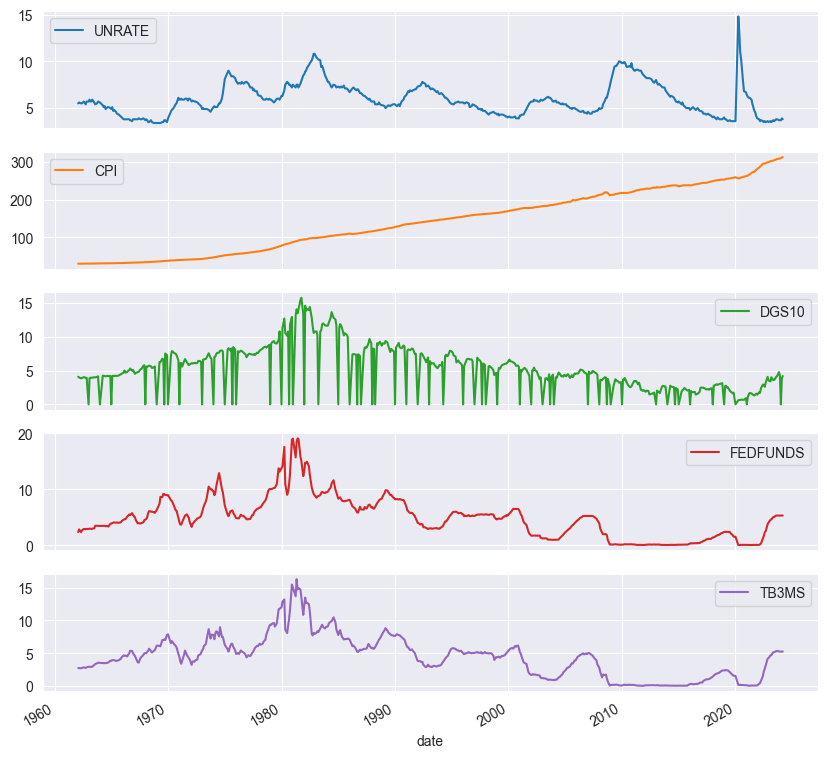

In [12]:
#plot the data in one plot
data.plot(subplots=True, figsize=(10, 10))
plt.show()

<AxesSubplot: xlabel='date'>

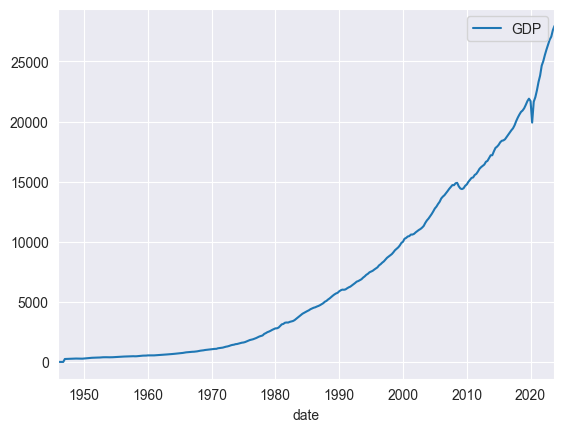

In [13]:
#plot GDP
GDP.plot()

In [14]:
#Append S&P 500 into the Data
df = pd.concat([data, sp500], axis='columns', join='inner')

In [15]:
df

,UNRATE,CPI,DGS10,FEDFUNDS,TB3MS,Close
1962-02-01,5.5,30.110,4.09,2.37,2.73,69.260002
1962-03-01,5.6,30.170,3.98,2.85,2.72,70.199997
1962-05-01,5.5,30.240,3.85,2.36,2.69,65.699997
1962-06-01,5.5,30.210,3.89,2.68,2.73,59.380001
1962-08-01,5.7,30.280,4.03,2.93,2.82,57.750000
...,...,...,...,...,...,...
2023-06-01,3.6,304.003,3.61,5.08,5.16,4221.020020
2023-08-01,3.8,306.187,4.05,5.33,5.30,4576.729980
2023-09-01,3.8,307.288,4.18,5.33,5.32,4515.770020
2023-11-01,3.7,308.024,4.77,5.33,5.27,4237.859863


In [16]:
#Get correlation between economic data and sp500
df.corr()

,UNRATE,CPI,DGS10,FEDFUNDS,TB3MS,Close
UNRATE,1.000000,-0.008782,0.264865,0.039737,0.035924,-0.237887
CPI,-0.008782,1.000000,-0.571264,-0.565332,-0.575344,0.871801
DGS10,0.264865,-0.571264,1.000000,0.904507,0.921109,-0.633912
FEDFUNDS,0.039737,-0.565332,0.904507,1.000000,0.989813,-0.533534
TB3MS,0.035924,-0.575344,0.921109,0.989813,1.000000,-0.537979
Close,-0.237887,0.871801,-0.633912,-0.533534,-0.537979,1.000000


<AxesSubplot: >

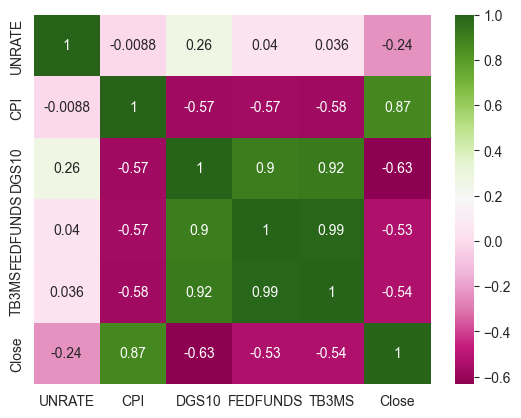

In [17]:
sns.heatmap(df.corr(), annot=True, cmap='PiYG')

In [18]:
#normalize df data
df = df / df.iloc[0, :]

<AxesSubplot: >

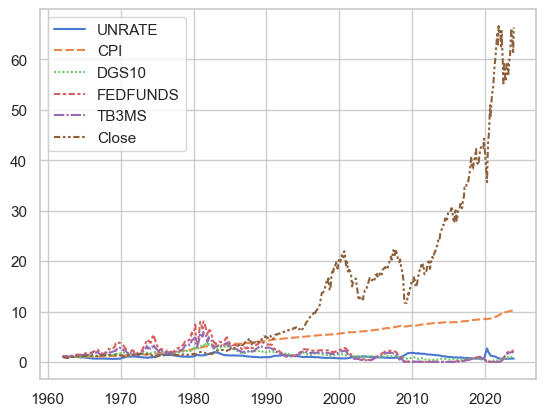

In [19]:
#plot the data with seaborn line plot
sns.set_theme(style="whitegrid", palette="muted")
sns.lineplot(data=df)